In [1]:
%matplotlib inline
from __future__ import print_function
import ganymede
ganymede.configure('uav.beaver.works')
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Fill in your name below

In [2]:
SUBMITTER = "Spencer Ng"

def check(p): ganymede.update(p,True)
check(0)

## Note

`cv2.imshow()` will not work in a notebook, even though the OpenCV tutorials use it. Instead, use `plt.imshow` and family to visualize your results.

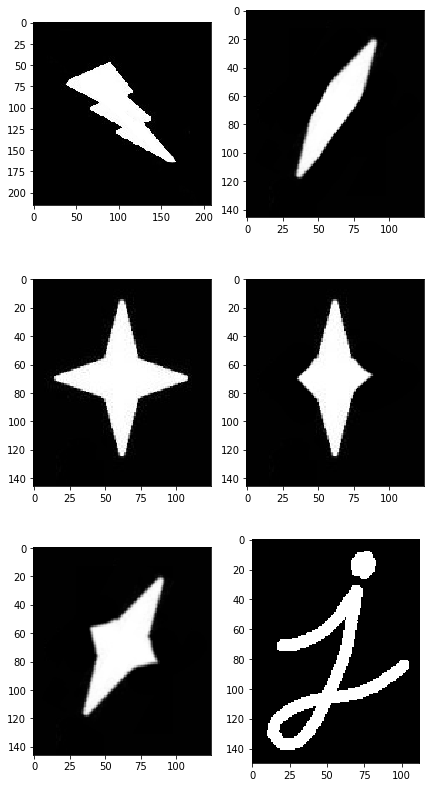

In [5]:
lightningbolt      = cv2.imread('lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    a.imshow(i, cmap='gray', interpolation='none');
fig.set_size_inches(7,14);

In [6]:
intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

75


## Question:

What would you expect the value to be, visually? What explains the actual value?

I would expect the value to be 2, as there appears to be only two colors/intensities in each image,  white (255) and black (0). However, the edges between the white and black contain many shades of grey, which explains the actual value.

## Thresholding

https://docs.opencv.org/3.4.1/d7/d4d/tutorial_py_thresholding.html

2


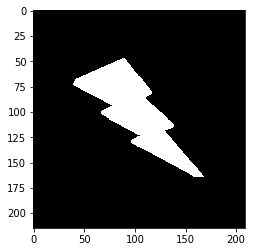

In [17]:
_, lightningbolt = cv2.threshold(cv2.imread('lightningbolt.png', cv2.IMREAD_GRAYSCALE),100,255,cv2.THRESH_BINARY)

intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

plt.imshow(lightningbolt, cmap='gray');

## Question
What happens when the above values are used for thresholding? What is a "good" value for thresholding the above images? Why?

100 is a good value for thresholding the above images, as it eliminates the "non-pure" blacks and changes their intensity to 0, without turning the "non-pure" whites into blacks, which would happen with a higher threshold value.

# Exercises

**Steps**

1. Read each tutorial
    * Skim all parts of each tutorial to understand what each operation does
    * Focus on the part you will need for the requested transformation
2. Apply the transformation and visualize it

## 1. Blend lightningbolt and blob together
https://docs.opencv.org/3.4.1/d0/d86/tutorial_py_image_arithmetics.html

*Remember:* Don't use `imshow` from OpenCV, use `imshow` from `matplotlib`

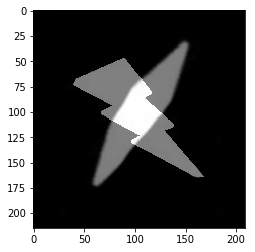

In [48]:
# 1. Blend
lb = cv2.imread('lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob = cv2.resize(blob, (lb.shape[1], lb.shape[0]))
result = cv2.addWeighted(lb, 0.5, blob, 0.5, 0)

plt.imshow(result, "gray")

## 2. Find a ROI which contains the point of the lightning bolt

https://docs.opencv.org/3.4.1/d3/df2/tutorial_py_basic_ops.html

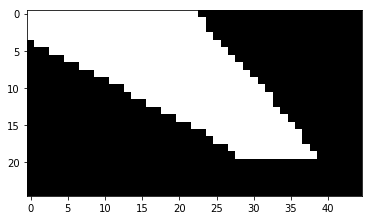

In [59]:
# 2. ROI
# TODO

point = lightningbolt[145:170,130:175]
plt.imshow(point, "gray")

## 3. Use an averaging kernel on the letter j

https://docs.opencv.org/3.4.1/d4/d13/tutorial_py_filtering.html

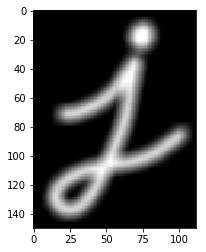

In [75]:
# 3. 
# TODO

kernel = np.ones((10,10),np.float32)/100
result_avg = cv2.filter2D(letterj,-1,kernel)

plt.imshow(result_avg, "gray")


# Morphology

https://docs.opencv.org/3.4.1/d9/d61/tutorial_py_morphological_ops.html

## 4. Perform erosion on j with a 3x3 kernel

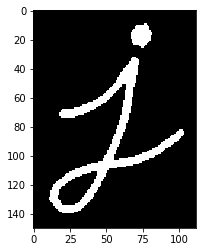

In [107]:
# 4
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(letterj,kernel,iterations = 1)
plt.imshow(erosion, "gray")

## 5. Perform erosion on j with a 5x5 kernel

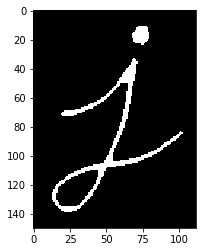

In [83]:
# 5
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(letterj,kernel,iterations = 1)
plt.imshow(erosion, "gray")

## 6. Perform erosion on j with __two__ iterations, using a kernel size of your choice

Hint: look at the OpenCV API documentation. It is possible to perform two iterations of erosion in one line of Python!

https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb



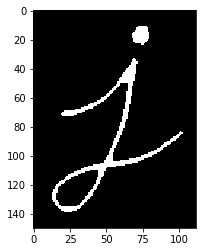

In [86]:
# 6
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(letterj,kernel,iterations = 2)
plt.imshow(erosion, "gray")

## 7. Perform dilation on j with a 3x3 kernel

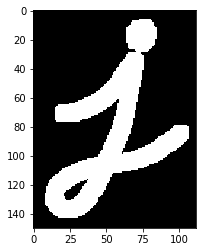

In [105]:
# 7
plt.imshow(cv2.dilate(letterj, kernel), "gray")

## 8. Perform dilation on j with a 5x5 kernel

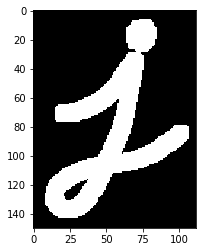

In [103]:
# 8
kernel = np.ones((5,5),np.uint8)
plt.imshow(cv2.dilate(letterj, kernel), "gray")

## 9. What is the effect of kernel size on morphology operations?

The larger the kernel size, the more you are "simplifying"  the image when performing morphology operations. At the same time, a larger kernel size significantly erodes/dilates the image compared to a smaller kernel size.

## 10. What is the difference betweeen repeated iterations of a morphology operation with a small kernel, versus a single iteration with a large kernel?

The result appears to be very similar for both erosion and dilation, as long as the number of iterations of the operation with a small kernel is sufficiently large compared to the larger kernel size.

## 11. Rotate the lightningbolt and star by 90 degrees

https://docs.opencv.org/3.4.1/da/d6e/tutorial_py_geometric_transformations.html

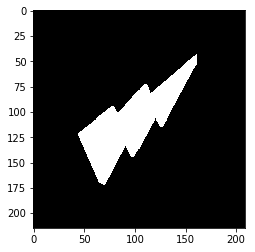

In [119]:
# 11
rows,cols = lightningbolt.shape
transform_matrix = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
result = cv2.warpAffine(lightningbolt, transform_matrix,(cols,rows))
plt.imshow(result, "gray")

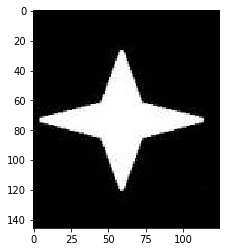

In [120]:
rows,cols = star.shape
transform_matrix = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
result = cv2.warpAffine(star, transform_matrix,(cols,rows))
plt.imshow(result, "gray")

## 12. STRETCH GOAL: 

Visualize the result of Laplacian, Sobel X, and Sobel Y on all of the images. Also, produce a combined image of both Sobel X and Sobel Y for each image. Is Exercise 1 the best way to do this? Are there other options? 

You should have 4 outputs (Laplacian, SobelX, SobelY, and the combination) for each input image visualized at the end.

https://docs.opencv.org/3.4.1/d5/d0f/tutorial_py_gradients.html

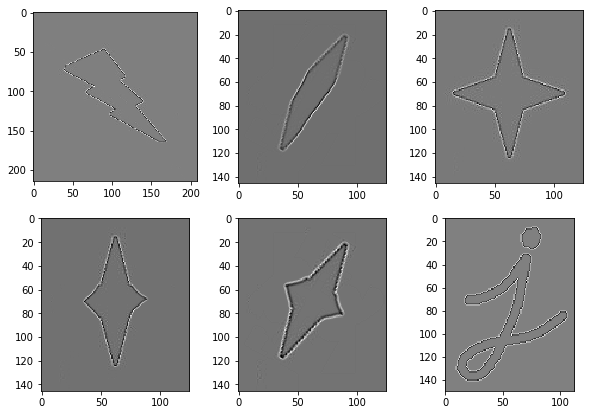

In [176]:
fig,ax = plt.subplots(nrows=3, ncols=2)
for i in range(len(images)):
    laplacian = cv2.Laplacian(images[i],cv2.CV_64F)
    plt.subplot(2,3,i+1),plt.imshow(laplacian,cmap = 'gray')
fig.set_size_inches(10,7)


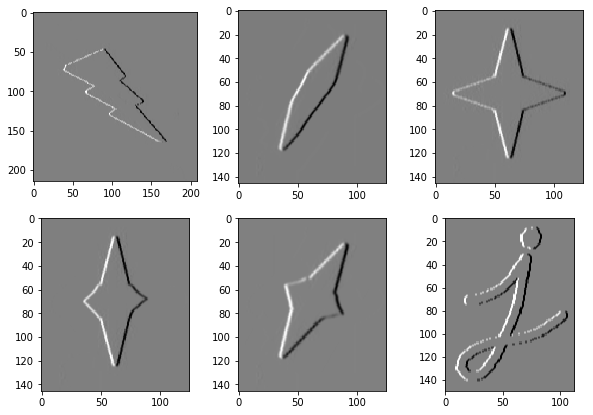

In [175]:
fig,ax = plt.subplots(nrows=3, ncols=2)
for i in range(len(images)):
    sobelx = cv2.Sobel(images[i],cv2.CV_64F,1,0)
    plt.subplot(2,3,i+1),plt.imshow(sobelx,cmap = 'gray')
fig.set_size_inches(10,7)

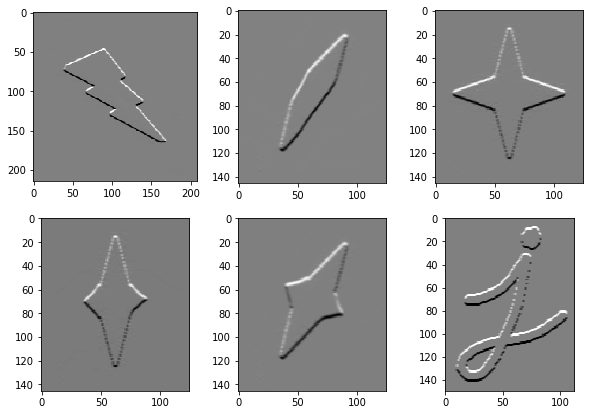

In [174]:
fig,ax = plt.subplots(nrows=3, ncols=2)
for i in range(len(images)):
    sobely = cv2.Sobel(images[i],cv2.CV_64F,0,1)
    plt.subplot(2,3,i+1),plt.imshow(sobely,cmap = 'gray')
fig.set_size_inches(10,7)

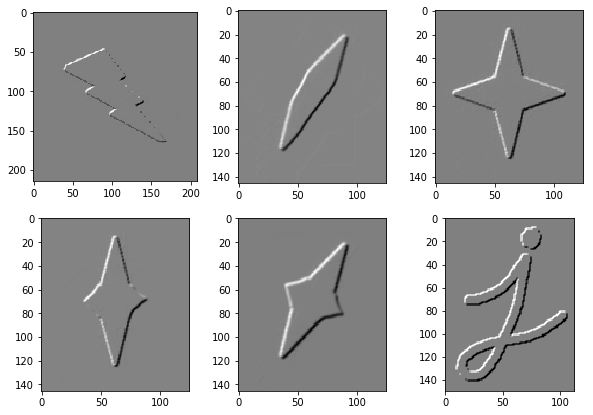

In [173]:
fig,ax = plt.subplots(nrows=3, ncols=2)
for i in range(len(images)):
    sobelx = cv2.Sobel(images[i],cv2.CV_64F,1,0)
    sobely = cv2.Sobel(images[i],cv2.CV_64F,0,1)
    sobel_comp = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0) #not currently used
    plt.subplot(2,3,i+1),plt.imshow(sobelx+sobely,cmap = 'gray')
fig.set_size_inches(10,7)

## When you are done:

You should have one or more images for each exercise.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 